# 01. Exploratory Data Analysis

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import altair as alt
alt.renderers.enable('altair_viewer')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data traning
data_path = '../00_data/raw_data.csv'
data = pd.read_csv(data_path, sep=';')

# preview first 5 rows
data.head()

,tickets,OPD
0,Mohon info agar KK saya dan E KTP saya agar se...,DINAS KEPENDUDUKAN DAN PENCATATAN SIPIL KOTA M...
1,Saya warga Kelurahan Karangbesuki yang sedang ...,DINAS KEPENDUDUKAN DAN PENCATATAN SIPIL KOTA M...
2,"Selamat sore. Saya warga kel. Pisang candi, ke...",DINAS KEPENDUDUKAN DAN PENCATATAN SIPIL KOTA M...
3,mohon informasi apakah blanko e ktp sudah ada?...,DINAS KEPENDUDUKAN DAN PENCATATAN SIPIL KOTA M...
4,saya mau merubah akte saya yang salah penulisa...,DINAS KEPENDUDUKAN DAN PENCATATAN SIPIL KOTA M...


## Number of tickets in each OPD

In [3]:
bars = alt.Chart(data).mark_bar(size=65).encode(
    x=alt.X('OPD'),
    y=alt.Y('count():Q', axis=alt.Axis(title='Number of tickets')),
    tooltip=[alt.Tooltip('count()', title='Number of tickets'), 'OPD'],
    color='OPD'
    )

text = bars.mark_text(
    align='center',
    baseline='bottom',
    ).encode(
        text='count()'
        )
        
chart = (bars + text).interactive().properties(
    height=300, 
    width=700,
    title='Number of tickets in each OPD'
    )

chart.show()

Displaying chart at http://localhost:20344/


## Percentage of tickets in each OPD

In [4]:
data['id'] = 1
data_count = pd.DataFrame(data.groupby('OPD').count()['id']).reset_index()

bars = alt.Chart(data_count).mark_bar(size=65).encode(
    x=alt.X('OPD'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='Percentage of Tickets')),
    color='OPD'
    ).transform_window(
        TotalArticles='sum(id)',
        frame=[None, None]
        ).transform_calculate(
            PercentOfTotal='datum.id / datum.TotalArticles'
            )

text = bars.mark_text(
    align='center',
    baseline='bottom',
    ).encode(
        text=alt.Text('PercentOfTotal:Q', format='.1%')
        )

chart = (bars + text).interactive().properties(
    height=300, 
    width=700,
    title = 'Percentage of tickets in each OPD'
    )

chart.show()

Displaying chart at http://localhost:20344/


## Tickets length by OPD


Text(0.5, 1.0, 'Tickets length distribution')

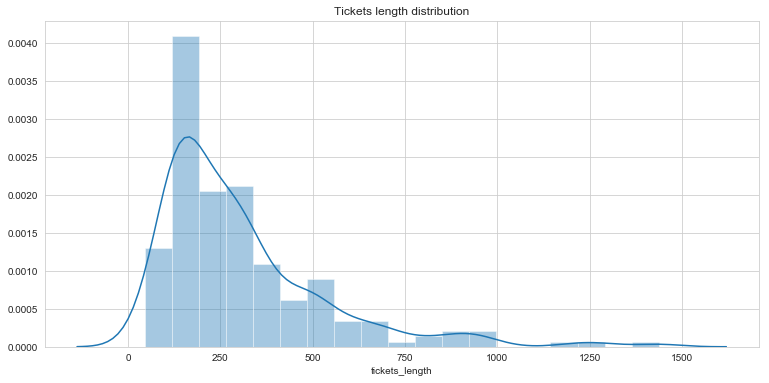

In [5]:
data['tickets_length'] = data['tickets'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(data['tickets_length']).set_title('Tickets length distribution')

In [6]:
data['tickets_length'].describe()

count     200.000000
mean      307.685000
std       230.993171
min        45.000000
25%       146.000000
50%       248.000000
75%       370.500000
max      1437.000000
Name: tickets_length, dtype: float64

Text(0.5, 1.0, 'News length distribution')

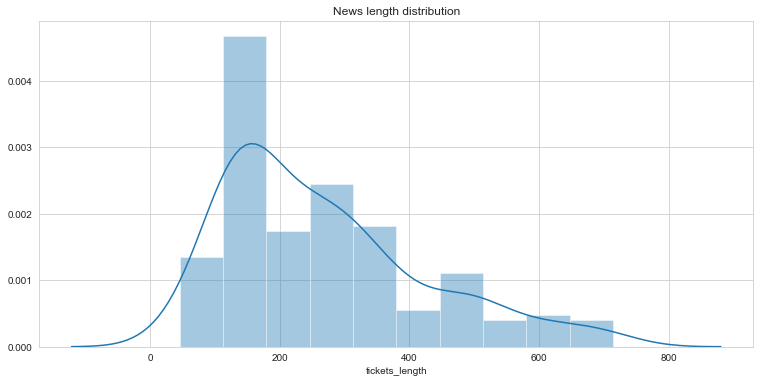

In [7]:
quantile = data['tickets_length'].quantile(0.95)
data_quantile = data[data['tickets_length'] < quantile]

plt.figure(figsize=(12.8,6))
sns.distplot(data_quantile['tickets_length']).set_title('News length distribution')

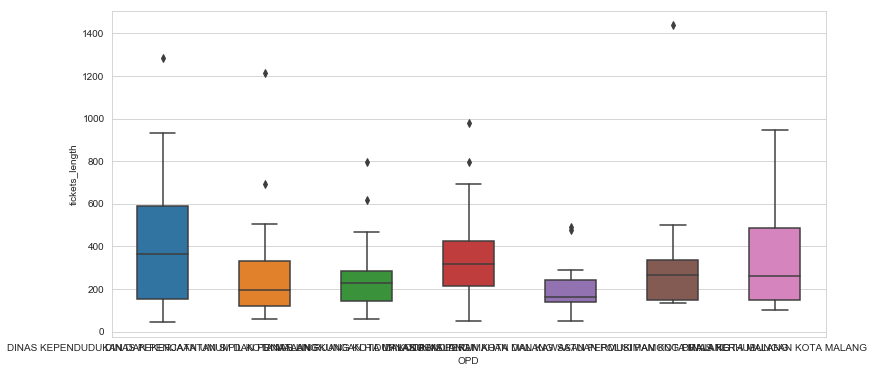

In [8]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=data, x='OPD', y='tickets_length', width=.5)

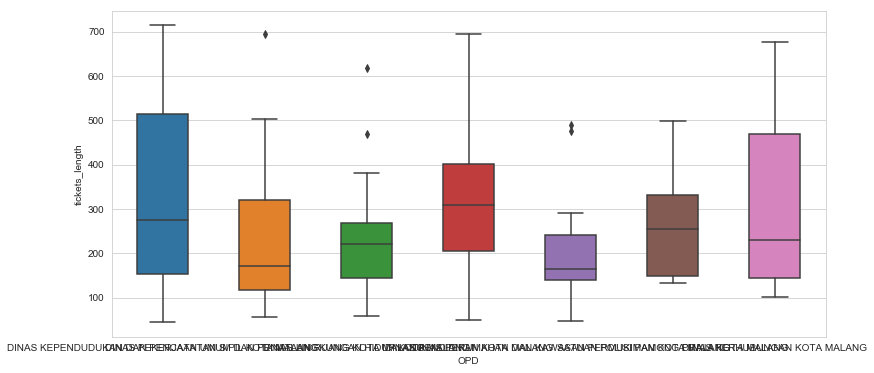

In [9]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=data_quantile, x='OPD', y='tickets_length', width=.5)

In [10]:
with open('01_pickle/01_data_training.pickle', 'wb') as output:
    pickle.dump(data, output)